# **Exploratory Data Analysis Lab**


## Objectives


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


Import the pandas module.


In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a dataframe.


In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


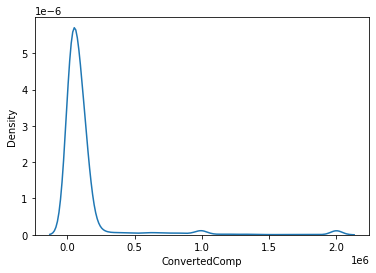

In [ ]:
# your code goes here
mean_df = df['ConvertedComp'].mean()
filled_df = df['ConvertedComp'].fillna(mean_df)
sns.distplot(filled_df,hist=False)


Plot the histogram for the column `ConvertedComp`.


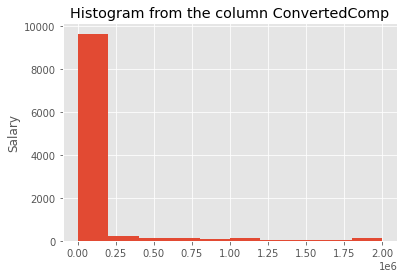

In [ ]:
# your code goes here
plt.style.use('ggplot')
plt.hist(df['ConvertedComp'].dropna(), bins=10)

plt.title('Histogram from the column ConvertedComp')
plt.ylabel('Salary')
plt.show()

What is the median of the column `ConvertedComp`?


In [ ]:
# your code goes here
print(f'Median os ConvertedComp column: {df["ConvertedComp"].median()}')
# What is the median Age of survey respondents?     
print(f'Median Age of Responents: {df["Age"].median()}')

Median os ConvertedComp column: 57745.0
Median Age of Responents: 29.0


How many responders identified themselves only as a **Man**?


In [ ]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [ ]:
# your code goes here
df.groupby(['Gender'], as_index=False)['ConvertedComp'].median()

,Gender,ConvertedComp
0,Man,57744.0
1,"Man;Non-binary, genderqueer, or gender non-con...",59520.0
2,"Non-binary, genderqueer, or gender non-conforming",67142.0
3,Woman,57708.0
4,Woman;Man,21648.0
5,"Woman;Man;Non-binary, genderqueer, or gender n...",30244.0
6,"Woman;Non-binary, genderqueer, or gender non-c...",65535.5


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [ ]:
# your code goes here
print(f'Median: {df["Age"].median()}')
print(f'Min: {df["Age"].min()}')
print(f'Max: {df["Age"].max()}')
print(f'Q1: {df["Age"].quantile(0.25)}')
print(f'Q3: {df["Age"].quantile(0.75)}')


Median: 29.0
Min: 16.0
Max: 99.0
Q1: 25.0
Q3: 35.0


Plot a histogram of the column `Age`.


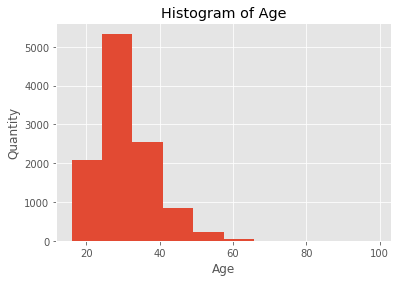

In [ ]:
# your code goes here
count, bins_div = np.histogram(df['Age'].dropna())
plt.style.use('ggplot')
plt.hist(df['Age'].dropna(), bins=bins_div)

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


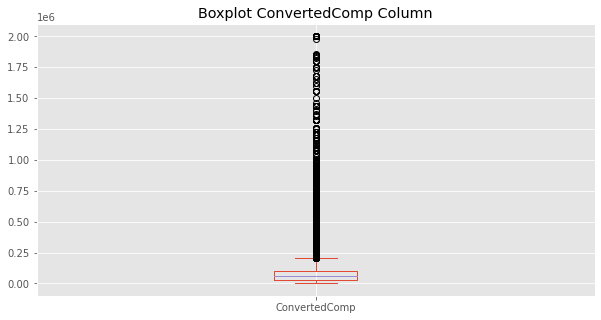

In [ ]:
# your code goes here
df['ConvertedComp'].plot(kind='box',figsize=(10,5))

plt.title('Boxplot ConvertedComp Column')
plt.show()

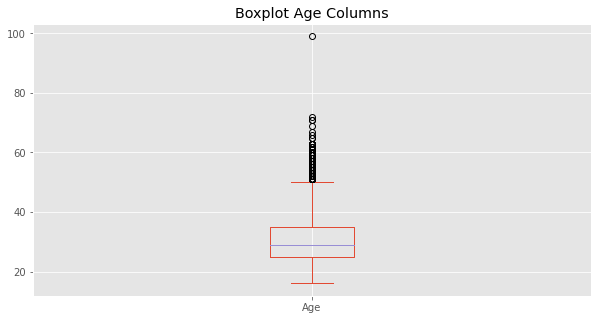

In [ ]:
df['Age'].plot(kind='box',figsize=(10,5))

plt.title('Boxplot Age Columns')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [ ]:
# your code goes here
df['ConvertedComp'].describe()
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1
print(f'The Inter Quartile Range: {iqr}')


The Inter Quartile Range: 73132.0


Find out the upper and lower bounds.


In [ ]:
# your code goes here
print(f'Max: {df["ConvertedComp"].max()}')
print(f'Min: {df["ConvertedComp"].min()}')



Max: 2000000.0
Min: 0.0


Identify how many outliers are there in the `ConvertedComp` column.


In [ ]:
# your code goes here
hi_outlier = q3 + 1.5*iqr
lo_outlier = q1 - 1.5*iqr
outliers_count = 0

for i in df['ConvertedComp']:
  if i < lo_outlier or i > hi_outlier:
    outliers_count += 1

print(f'Outliers Count: {outliers_count}')


Outliers Count: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
# your code goes here
no_outliers=[]
for i in df['ConvertedComp']:
  if i > lo_outlier and i < hi_outlier:
    no_outliers.append(i)

new_df = pd.DataFrame(no_outliers)
print(f'ConvertedComp new median: {new_df.median()}')
print(f'ConvertedComp new mean: {new_df.mean()}')



ConvertedComp new median: 0    52704.0
dtype: float64
ConvertedComp new mean: 0    59883.208389
dtype: float64


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [ ]:
# your code goes here
df.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
